In [2]:
import pandas as pd
#from pandas_datareader import data as web
import io
import pickle
import datetime as dt

#pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format='retina'

today = dt.datetime.today().strftime("%d-%m-%Y %H:%M")
pd.set_option('display.float_format','{:,.2f}'.format)

print(f"pandas  version = {pd.__version__}")
print(today)

pandas  version = 1.0.5
01-12-2020 16:31


## Function

In [11]:
def read_pickle(files =None ):
    # ดึงข้อมูลเดิมขุึ้นมา

    pickle_off = open(files,"rb")
    df = pickle.load(pickle_off)
    
    return df
##====================##

def write_pickle(data,files =None ):
    pickling_on = open(files,"wb")
    pickle.dump(data, pickling_on)
    pickling_on.close()
    print('dump success')
    

## Read Data from Clipboard

In [4]:
df = pd.read_clipboard()
df

EmptyDataError: No columns to parse from file

In [54]:
df = df.loc[:, ['company','type','month','year','price','count']]
df

,company,type,month,year,price,count
0,คุณนิลยารัตน์ รัตนศรีโรจน์,IDEC,8,2020,"1,235.00",50
1,คุณพุทธา ธรรมบำรุง,IDEC,8,2020,"1,335.00",54
2,คุณเพียงนภา ทาทอง,CONT,8,2020,"3,098.00",264
3,คุณเพียงนภา ทาทอง,XDEC,8,2020,"5,862.00",231
4,คุณอนงค์ คงศรี,IDEC,8,2020,"2,560.00",103
...,...,...,...,...,...,...
2157,หจก. ไฮบริด เฟรท โลจิสติกส,IDEC,8,2020,"1,112.00",44
2158,หจก. ไฮบริด เฟรท โลจิสติกส,RGOODSPMT,8,2020,455.00,13
2159,หจก. ไฮบริด เฟรท โลจิสติกส,SHOT,8,2020,230.00,23
2160,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,8,2020,"5,199.00",198


In [7]:
files = 'data/transection.pickle'

write_pickle(df,files)

dump success


## Manage Data

In [5]:
def read_data(files):
    n = ['company','type','month','year','price','count']
    
 #   RefNO,MessageType,UserID,CmpToSend,DataTaxNo,IsCancel,ItemCount,FileLen,CATCharge,RespNO,RespMessage,recdate,rectime
 #  pd.read_csv("data/mindex_ex.csv", index_col=[0, 1])
    df = pd.read_csv((f'data/{files}.csv'),header=None,names=n)
    
    return df

In [7]:
#years = '2012-2015'
#years = '2016-2019'
#years = 'half_year_2020'

data_1 = read_data('ECS_2012_2015')
data_2= read_data('ECS_2016_2019')
data_3= read_data('ECS_2020')
data_3.sample(20)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (0,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,company,type,month,year,price,count
205559034540,บริษัท ทวีทรัพย์ อี-คัสตอม เคาน์เตอร์เซอร์วิส ...,IDEC,4,2020,178.00,2
105533036562,บริษัท เอส.เอ็น.พี. ชิปปิ้ง กรุ๊ป จำกัด,SHOT,4,2020,50.00,5
105546062168,บริษัท แพนเวิลด์ อินเตอร์เนชั่นแนล จำกัด,IDEC,11,2020,77.00,1
105554085767,บริษัท เอ็กซิมเน็ท จำกัด,XDEC,11,2020,354.00,6
115559000573,บริษัท 27 โนเวมเบอร์ จำกัด,IDEC,5,2020,140.00,4
105539018817,บริษัท เอฟ ที เอส บริการขนส่ง บจก.,IDEC,9,2020,60.00,2
105544013224,บริษัท วาย ซี เอช (ประเทศไทย) จำกัด,IDEC,1,2020,86.00,2
105545113583,บริษัท ยูนิค โกลบัล โลจิสติคส์ จำกัด,IDEC,2,2020,86.00,2
205553016779,บริษัท บี แอนด์ ที โลจิสติกส์ จำกัด,XDEC,2,2020,59.00,1
105531098340,บริษัท เค.จี.เอ็ม.เซอร์วิส จำกัด,IDEC,3,2020,425.00,5


In [8]:
data = pd.concat([data_1,data_2,data_3], ignore_index=True)
data.sample(20)

,company,type,month,year,price,count
828159,บริษัท สยาม ไอ-โลจิสติคส์ จำกัด,XDEC,1,2017,142.00,2
834836,บริษัท สยามสากลบริการ จำกัด,IDEC,5,2016,124.00,2
770026,บริษัท เลสชาโก้ คัสตอม เคลียเรนซ์ (ประเทศไทย) ...,XDEC,8,2016,46.00,1
513936,บริษัท ซินธีส (ประเทศไทย) จำกัด,CONT,9,2016,612.00,51
58631,บริษัท ไชยพิณดิเวลลอปเมนท์ จำกัด,XDEC,12,2015,54,2
590344,บริษัท ที เอส คอนเทนเนอร์ไลน์ (ประเทศไทย) จำกัด,MMAN,11,2019,297.00,1
929394,บริษัท เอ็ม.พี.อินเตอร์ โปรเกรส จำกัด,CONT,2,2016,20.00,2
372480,บริษัท เอ็ม เอ็ม ลอจิสติคส์ จำกัด (สงขลา) จำกัด,XDEC,7,2013,2625,105
13100,บริษัท โกลด์อินเตอร์ ชิปปิ้ง แอนด์ ทรานสปอร์ต ...,IDEC,9,2013,140,5
959493,บริษัท โอกิทานิ (ไทยแลนด์) จำกัด,XDEC,9,2016,51.00,1


In [9]:
print("Before : ",len(data))
data = data.drop_duplicates(keep= 'last')
print("After : ", len(data))
data

Before :  1142889
After :  1142882


,company,type,month,year,price,count
0,company,type,month,year,price,count
1,กัลล์ วิง บจก.,CONT,11,2012,120,10
2,กัลล์ วิง บจก.,XDEC,2,2013,375,15
3,กัลล์ วิง บจก.,XDEC,11,2012,30,1
4,กัลล์ วิง บจก.,XDEC,11,2012,29,1
...,...,...,...,...,...,...
1142884,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,5,2020,36.00,1
1142885,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,8,2020,186.00,3
1142886,หจก. ไฮบริด เฟรท โลจิสติกส,IDEC,2,2020,54.00,2
1142887,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,4,2020,45.00,1


files = 'transection.pkl'

master = read_pickle(files)
master

In [45]:
data_3 = pd.concat([data_1,data_2], axis=0) 
data_3

,company,type,month,year,price,count
"3,960,500,423,462.00",คุณนิลยารัตน์ รัตนศรีโรจน์,IDEC,8,2020,"1,235.00",50
"3,969,800,094,420.00",คุณพุทธา ธรรมบำรุง,IDEC,8,2020,"1,335.00",54
"3,320,901,016,731.00",คุณเพียงนภา ทาทอง,CONT,8,2020,"3,098.00",264
"3,320,901,016,731.00",คุณเพียงนภา ทาทอง,XDEC,8,2020,"5,862.00",231
"3,969,800,096,732.00",คุณอนงค์ คงศรี,IDEC,8,2020,"2,560.00",103
...,...,...,...,...,...,...
"103,556,055,464.00",หจก. ไฮบริด เฟรท โลจิสติกส,IDEC,9,2020,862.00,31
"103,556,055,464.00",หจก. ไฮบริด เฟรท โลจิสติกส,RGOODSPMT,9,2020,560.00,16
"103,556,055,464.00",หจก. ไฮบริด เฟรท โลจิสติกส,SHOT,9,2020,140.00,14
"103,556,055,464.00",หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,9,2020,"5,221.00",199


In [46]:
data_3 = data_3.reset_index(drop=True)
data_3 = data_3.loc[:, ['company','type','month','year','price','count']]
data_3

,company,type,month,year,price,count
0,คุณนิลยารัตน์ รัตนศรีโรจน์,IDEC,8,2020,"1,235.00",50
1,คุณพุทธา ธรรมบำรุง,IDEC,8,2020,"1,335.00",54
2,คุณเพียงนภา ทาทอง,CONT,8,2020,"3,098.00",264
3,คุณเพียงนภา ทาทอง,XDEC,8,2020,"5,862.00",231
4,คุณอนงค์ คงศรี,IDEC,8,2020,"2,560.00",103
...,...,...,...,...,...,...
4302,หจก. ไฮบริด เฟรท โลจิสติกส,IDEC,9,2020,862.00,31
4303,หจก. ไฮบริด เฟรท โลจิสติกส,RGOODSPMT,9,2020,560.00,16
4304,หจก. ไฮบริด เฟรท โลจิสติกส,SHOT,9,2020,140.00,14
4305,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,9,2020,"5,221.00",199


In [47]:
df =  pd.concat([data,data_3], axis=0) 
df

,company,type,month,year,price,count
0,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,3,2020,315.00,9
1,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,5,2018,700.00,20
2,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,5,2020,70.00,2
3,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,6,2017,385.00,11
4,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,6,2019,105.00,3
...,...,...,...,...,...,...
4302,หจก. ไฮบริด เฟรท โลจิสติกส,IDEC,9,2020,862.00,31
4303,หจก. ไฮบริด เฟรท โลจิสติกส,RGOODSPMT,9,2020,560.00,16
4304,หจก. ไฮบริด เฟรท โลจิสติกส,SHOT,9,2020,140.00,14
4305,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,9,2020,"5,221.00",199


In [48]:
df = df.drop_duplicates(keep= 'last')
df

,company,type,month,year,price,count
0,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,3,2020,315.00,9
1,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,5,2018,700.00,20
2,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,5,2020,70.00,2
3,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,6,2017,385.00,11
4,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,6,2019,105.00,3
...,...,...,...,...,...,...
4302,หจก. ไฮบริด เฟรท โลจิสติกส,IDEC,9,2020,862.00,31
4303,หจก. ไฮบริด เฟรท โลจิสติกส,RGOODSPMT,9,2020,560.00,16
4304,หจก. ไฮบริด เฟรท โลจิสติกส,SHOT,9,2020,140.00,14
4305,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,9,2020,"5,221.00",199


In [1]:
df  = df.reset_index()
df

NameError: name 'df' is not defined

In [50]:
df = df.loc[:, ['company','type','month','year','price','count']]
df

,company,type,month,year,price,count
0,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,3,2020,315.00,9
1,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,5,2018,700.00,20
2,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,5,2020,70.00,2
3,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,6,2017,385.00,11
4,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,6,2019,105.00,3
...,...,...,...,...,...,...
176016,หจก. ไฮบริด เฟรท โลจิสติกส,IDEC,9,2020,862.00,31
176017,หจก. ไฮบริด เฟรท โลจิสติกส,RGOODSPMT,9,2020,560.00,16
176018,หจก. ไฮบริด เฟรท โลจิสติกส,SHOT,9,2020,140.00,14
176019,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,9,2020,"5,221.00",199


In [12]:
files = 'data\\transection.pickle'

write_pickle(data,files)

dump success


In [2]:
years = 2020
files ='data\\transection.pickle'

data = read_pickle(files)
data

NameError: name 'read_pickle' is not defined

In [18]:
df = data.groupby(['company','year','month']).sum()
df = df.reset_index()
df

,company,year,month,price,count
0,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,2017,6,385.00,11
1,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,2017,7,455.00,13
2,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,2017,8,70.00,2
3,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,2017,11,70.00,2
4,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,2017,12,175.00,5
...,...,...,...,...,...
58899,ไทยอคริลิค ไฟเบอร์ บจก.,2012,1,"7,246.00",485
58900,ไทยอคริลิค ไฟเบอร์ บจก.,2012,2,"8,195.00",543
58901,ไทยอคริลิค ไฟเบอร์ บจก.,2012,3,"10,314.00",692
58902,ไทยอคริลิค ไฟเบอร์ บจก.,2012,4,"7,026.00",482


In [19]:
data.to_csv('data/transection.csv')

In [20]:
report_year =  pd.pivot_table(df, values='price', aggfunc='mean', index=['company'], columns=['year'])
report_year = report_year.sort_values(by=years, ascending=False)
report_year

year,2012,2013,2014,2015,2016,2017,2018,2019,2020
company,,,,,,,,,
บริษัท เอ็กซิมเน็ท จำกัด,"518,738.58","509,308.42","573,795.00","536,624.17","650,550.67","699,292.50","703,720.67","591,197.58","523,081.43"
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,"222,909.50","241,667.00","280,047.42","289,288.25","298,660.58","331,236.08","340,344.92","320,995.83","317,129.86"
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,"83,597.42","176,438.17","169,701.58","209,794.67","219,236.67","262,767.42","292,143.67","261,850.00","221,376.71"
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,"171,909.17","182,861.08","194,264.75","220,384.83","214,116.25","231,828.67","235,854.08","212,052.58","194,366.00"
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,"92,064.67","102,697.50","114,574.08","123,836.67","148,586.33","178,739.08","204,529.67","206,718.00","150,774.86"
...,...,...,...,...,...,...,...,...,...
โบริษัท โอเอซิส เคาน์เตอร์ เซอร์วิสซ์ จำกัด,"54,402.42","52,932.58","48,081.67","43,836.58","59,123.00","66,056.00","69,509.00","45,853.50",nan
โลจิเทม (ประเทศไทย) บจก.,"7,118.83","11,118.17","10,154.83",nan,nan,nan,nan,nan,nan
ไจแอ้นท์ ฟู้ด โปรดักส์ จำกัด,106.20,nan,nan,nan,nan,nan,nan,nan,nan


In [21]:
report_year.head(20)

year,2012,2013,2014,2015,2016,2017,2018,2019,2020
company,,,,,,,,,
บริษัท เอ็กซิมเน็ท จำกัด,"518,738.58","509,308.42","573,795.00","536,624.17","650,550.67","699,292.50","703,720.67","591,197.58","523,081.43"
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,"222,909.50","241,667.00","280,047.42","289,288.25","298,660.58","331,236.08","340,344.92","320,995.83","317,129.86"
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,"83,597.42","176,438.17","169,701.58","209,794.67","219,236.67","262,767.42","292,143.67","261,850.00","221,376.71"
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,"171,909.17","182,861.08","194,264.75","220,384.83","214,116.25","231,828.67","235,854.08","212,052.58","194,366.00"
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,"92,064.67","102,697.50","114,574.08","123,836.67","148,586.33","178,739.08","204,529.67","206,718.00","150,774.86"
บริษัท เค.จี.เอ็ม.เซอร์วิส จำกัด,"67,442.00","89,468.75","116,668.08","122,793.92","138,072.33","149,195.00","165,686.17","172,000.58","146,881.71"
บริษัท เอฟ ที เอส บริการขนส่ง บจก.,"142,707.08","128,201.92","142,069.25","155,414.83","148,502.00","155,689.17","138,986.00","142,745.75","135,735.14"
บริษัท บีดีพี เอเชีย-แปซิฟิค จำกัด,"68,510.50","70,932.50","72,976.67","71,170.42","78,528.25","112,734.08","124,872.00","126,039.42","108,900.86"
บริษัท ไดนามิคอินเตอร์ทรานสปอร์ต จำกัด,nan,nan,"55,014.50","76,635.92","89,809.00","93,364.92","98,474.83","100,870.75","107,301.00"


In [22]:
report_year.sum()

year
2012   4,645,715.56
2013   4,704,050.87
2014   5,002,551.70
2015   5,301,560.57
2016   5,795,239.31
2017   6,529,759.20
2018   6,913,407.48
2019   6,997,948.40
2020   6,303,818.81
dtype: float64

In [23]:
years = data.year.unique()
years.sort()
sou_sum = list(report_year.sum())
#del sou_sum[6]
sr_cus = pd.Series(sou_sum,
                    index=years)

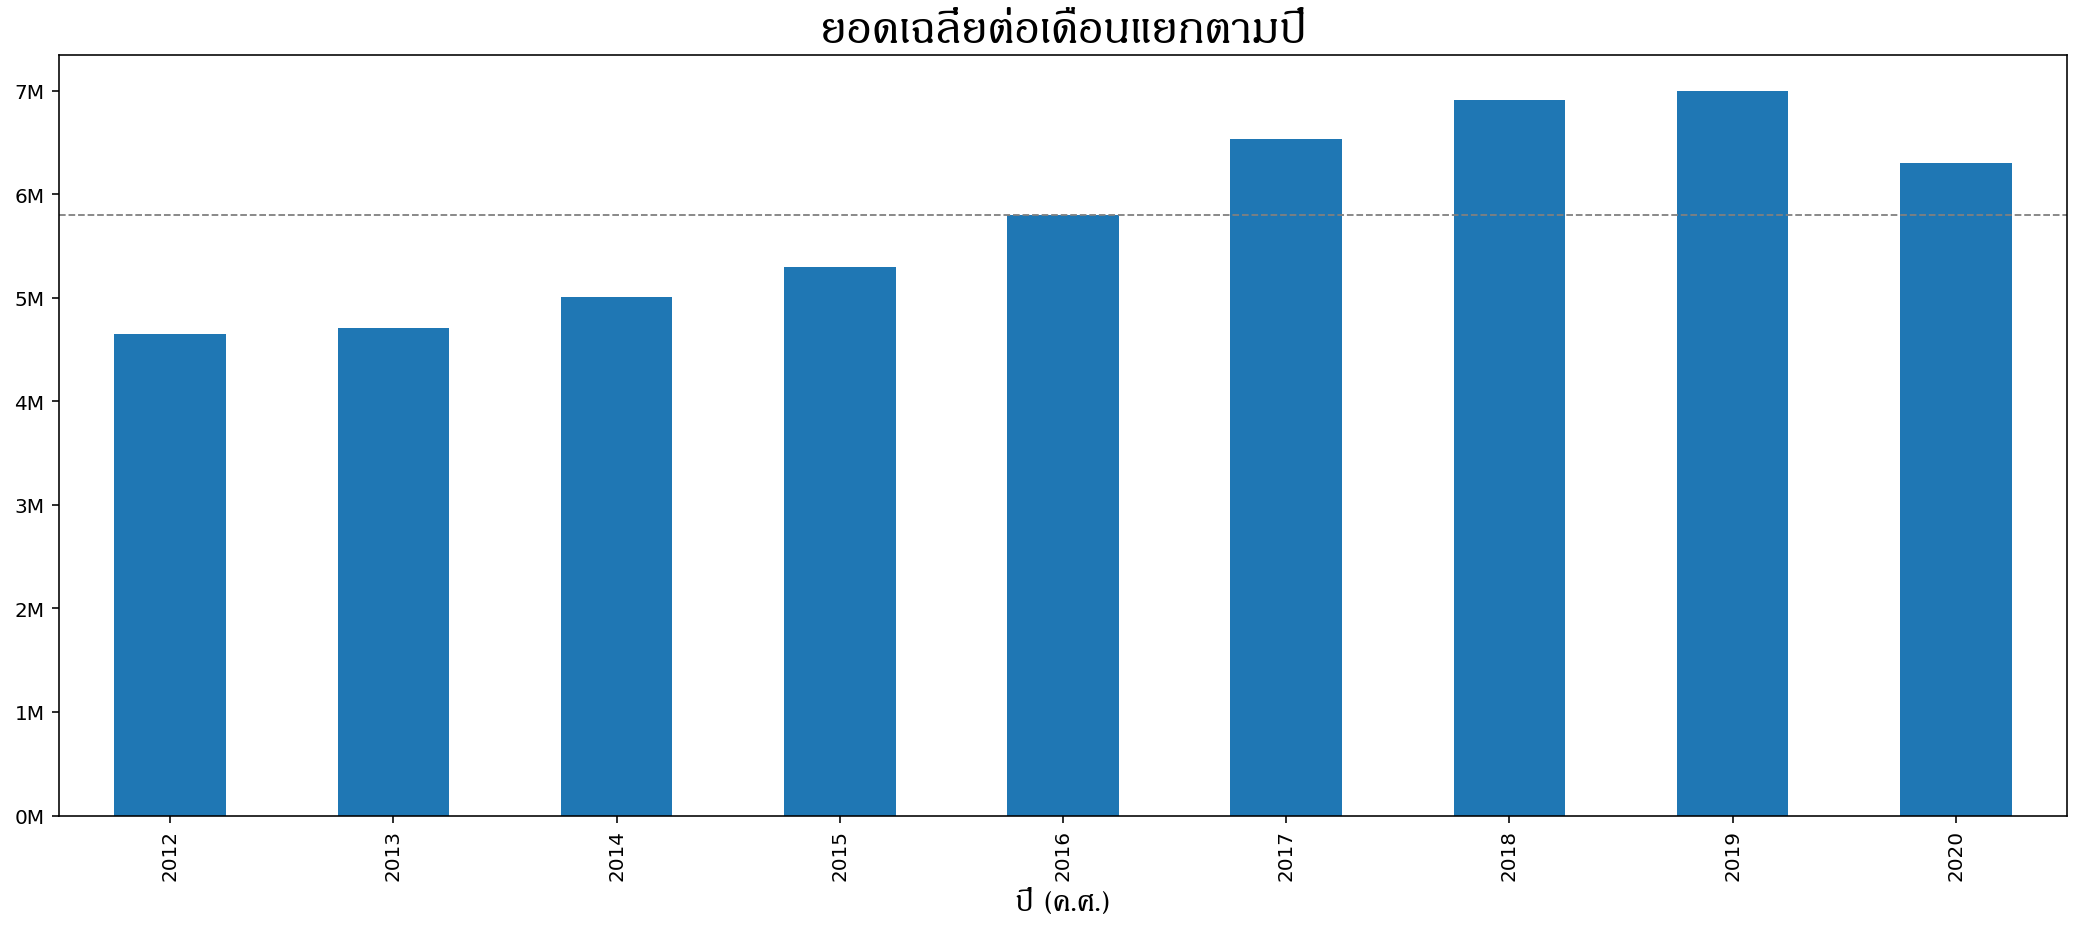

In [24]:
ax=sr_cus.plot(kind='bar', figsize=(18, 7)) 
ax.set_title(u'ยอดเฉลี่ยต่อเดือนแยกตามปี',fontname='JasmineUPC',fontsize=30)
ax.axhline(sr_cus.mean(), color="gray", linestyle="--", linewidth=.9)
#ax.set_ylabel(u'จำนวน (บริษัท)',fontname='JasmineUPC',fontsize=20)
ax.set_xlabel(u'ปี (ค.ศ.)',fontname='JasmineUPC',fontsize=20);
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}M".format(v / 1000000)));

In [25]:
df_curr = data[data['year'] == 2020]
df_curr

,company,type,month,year,price,count
432523,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,5,2020,70.00,2
432524,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,3,2020,315.00,9
432529,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,4,2020,350.00,10
432538,คุณนิลยารัตน์ รัตนศรีโรจน์,IDEC,3,2020,"1,350.00",54
432540,คุณนิลยารัตน์ รัตนศรีโรจน์,IDEC,6,2020,"2,850.00",114
...,...,...,...,...,...,...
1091288,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,6,2020,76.00,2
1091294,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,2,2020,74.00,2
1091305,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,3,2020,93.00,3
1091307,หจก. ไฮบริด เฟรท โลจิสติกส,CONT,1,2020,"1,104.00",92


In [26]:

df_curr = df_curr.groupby(['company', 'month']).sum()
df_curr.describe()

,year,price,count
count,"5,056.00","5,056.00","5,056.00"
mean,"34,334.01","8,614.11",365.10
std,"65,660.78","29,385.14","1,182.47"
min,"2,020.00",0.00,1.00
25%,"4,040.00",585.75,24.00
50%,"12,120.00","2,082.50",87.50
75%,"34,845.00","6,628.50",275.25
max,"882,740.00","623,131.00","20,930.00"


In [27]:
m = 7

pv_curr = pd.pivot_table(df_curr, values='price', aggfunc='mean', index=['company'], columns=['month'])
pv_curr['change']=(pv_curr[m] - pv_curr[m-1])/pv_curr[m-1]*100
pv_curr.sort_values(by=m, ascending=False)

month,1,2,3,4,5,6,7,change
company,,,,,,,,
บริษัท เอ็กซิมเน็ท จำกัด,"574,456.00","541,917.00","623,131.00","511,015.00","456,973.00","470,335.00","483,743.00",2.85
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,"322,148.00","313,919.00","344,887.00","342,302.00","285,703.00","303,276.00","307,674.00",1.45
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,"251,650.00","214,250.00","273,802.00","216,569.00","189,822.00","194,707.00","208,837.00",7.26
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,"207,809.00","199,054.00","204,534.00","188,351.00","169,357.00","190,825.00","200,632.00",5.14
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,"185,008.00","152,786.00","166,084.00","102,373.00","113,803.00","164,756.00","170,614.00",3.56
...,...,...,...,...,...,...,...,...
หจก. ท่าทรายศรีเผย มุกดาหาร,"23,275.00","2,025.00",nan,nan,nan,nan,nan,nan
หจก. พี ทองชู เซอร์วิสเซส,"7,712.00","2,484.00","1,042.00",nan,nan,nan,nan,nan
หจก. อิสมา (ไทยแลนด์),nan,nan,35.00,nan,nan,nan,nan,nan


In [28]:
pv_curr.sum()

month
1        6,867,564.00
2        6,214,939.00
3        6,945,076.50
4        6,005,060.00
5        5,627,139.50
6        5,845,568.00
7        6,047,569.00
change      20,661.00
dtype: float64

In [29]:
pv_curr_sum = list(pv_curr.sum())
print(pv_curr_sum)
pv_curr_sum[7]

[6867564.0, 6214939.0, 6945076.5, 6005060.0, 5627139.5, 5845568.0, 6047569.0, 20660.999234379597]


20660.999234379597

In [30]:
pv_curr_sum = list(pv_curr.sum())
del pv_curr_sum[7]
sr_cus = pd.Series(pv_curr_sum,
                    index=['Jan','Feb','Mar','Apr','May','June','July'])

In [31]:
pv_curr_sum

[6867564.0, 6214939.0, 6945076.5, 6005060.0, 5627139.5, 5845568.0, 6047569.0]

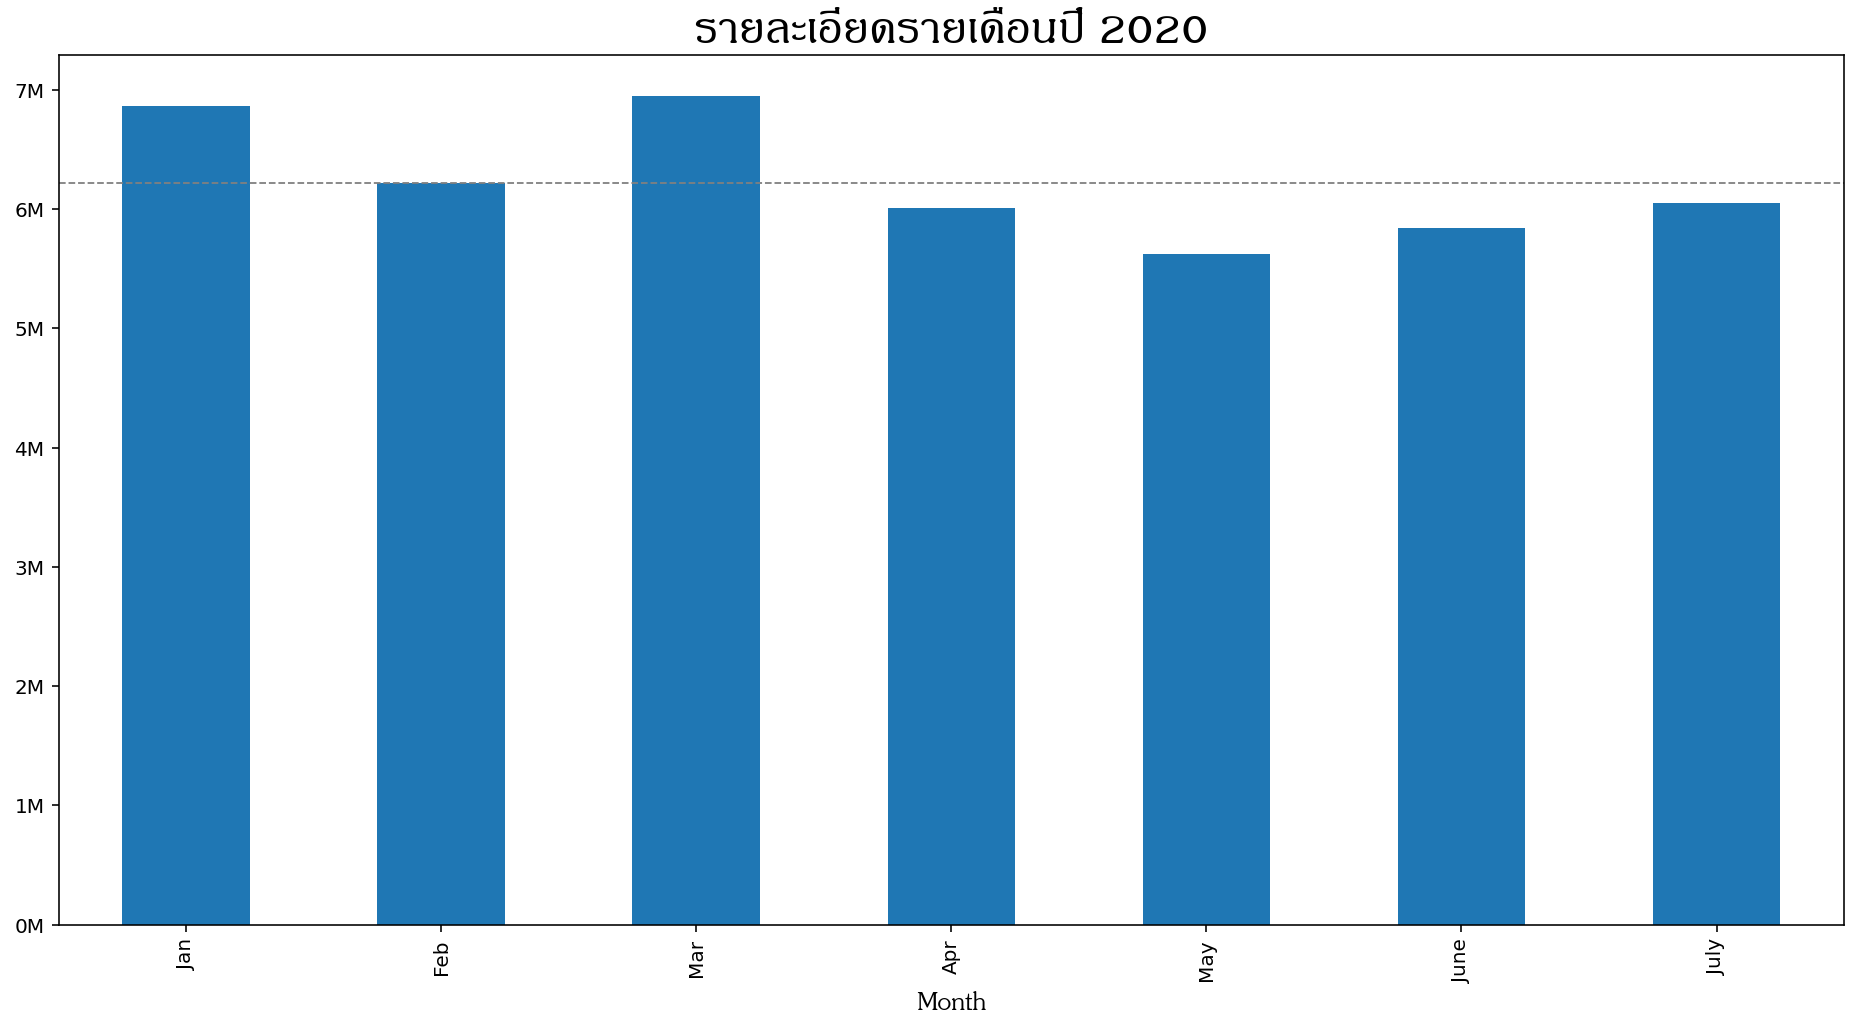

In [32]:
ax=sr_cus.plot(kind='bar',figsize=(16, 8)) 
ax.set_title(u'รายละเอียดรายเดือนปี 2020',fontname='JasmineUPC',fontsize=30)
ax.axhline(sr_cus.mean(), color="gray", linestyle="--", linewidth=.9)
ax.set_xlabel(u'Month',fontname='JasmineUPC',fontsize=20);
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}M".format(v / 1000000)));

In [33]:
# ตรวจสอบบริษัทที่มีการเปลี่ยนแปลงมาก
pv_curr.sort_values(by='change')

month,1,2,3,4,5,6,7,change
company,,,,,,,,
บริษัท เตียวฮงสีลม จำกัด,105.00,70.00,105.00,140.00,35.00,455.00,35.00,-92.31
บริษัท คอสโมอินดัสตรีส์ จำกัด,382.00,407.00,226.00,176.00,193.00,529.00,97.00,-81.66
บริษัท เอเชีย แอตแลนติก ไลน์เนอร์ จำกัด,nan,nan,nan,nan,nan,840.00,195.00,-76.79
หจก. บางกอกเคมาร์ท,nan,140.00,nan,70.00,nan,140.00,35.00,-75.00
บริษัท เกทเวย์ คอนเทนเนอร์ ไลน์ จำกัด,671.00,276.00,575.00,"1,053.00",634.00,"1,131.00",310.00,-72.59
...,...,...,...,...,...,...,...,...
หจก. พี ทองชู เซอร์วิสเซส,"7,712.00","2,484.00","1,042.00",nan,nan,nan,nan,nan
หจก. อิสมา (ไทยแลนด์),nan,nan,35.00,nan,nan,nan,nan,nan
หจก. เอก-อำนวยฟาร์ม เซอร์วิส,nan,nan,nan,nan,343.00,37.00,nan,nan


In [34]:
# ดึงข้อมูลปีปัจจุบันและปีก่อนหน้า
df_2018= df[(df.year == 2020) |(df.year == 2019)]
df_2018=df_2018.groupby(['company', 'year','month']).sum()
df_2018.describe()

,price,count
count,"13,761.00","13,761.00"
mean,"9,079.78",382.00
std,"31,465.96","1,256.78"
min,0.00,1.00
25%,595.00,24.00
50%,"2,159.00",91.00
75%,"6,963.00",295.00
max,"657,174.00","22,727.00"


In [36]:
pv_2018=pd.pivot_table(df_2018, values='price', aggfunc='mean', index=['company'], columns=['year'])
pv_2018['change']=(pv_2018[2020]-pv_2018[2019])/pv_2018[2019]*100
pv_2018['Ranked_2019']=pv_2018[2019].rank(ascending=0,method='max')
pv_2018['Ranked_2020']=pv_2018[2020].rank(ascending=0,method='max')
pv_2018['Rank_Change']=pv_2018['Ranked_2019']-pv_2018['Ranked_2020']
pv_2018=pv_2018.sort_values(by='Ranked_2020')
pv_2018.head(10)

year,2019,2020,change,Ranked_2019,Ranked_2020,Rank_Change
company,,,,,,
บริษัท เอ็กซิมเน็ท จำกัด,"591,197.58","523,081.43",-11.52,1.00,1.00,0.00
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,"320,995.83","317,129.86",-1.20,2.00,2.00,0.00
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,"261,850.00","221,376.71",-15.46,3.00,3.00,0.00
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,"212,052.58","194,366.00",-8.34,4.00,4.00,0.00
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,"206,718.00","150,774.86",-27.06,5.00,5.00,0.00
บริษัท เค.จี.เอ็ม.เซอร์วิส จำกัด,"172,000.58","146,881.71",-14.60,6.00,6.00,0.00
บริษัท เอฟ ที เอส บริการขนส่ง บจก.,"142,745.75","135,735.14",-4.91,8.00,7.00,1.00
บริษัท บีดีพี เอเชีย-แปซิฟิค จำกัด,"126,039.42","108,900.86",-13.60,9.00,8.00,1.00
บริษัท ไดนามิคอินเตอร์ทรานสปอร์ต จำกัด,"100,870.75","107,301.00",6.37,10.00,9.00,1.00


In [38]:
a_2018=pd.pivot_table(df_2018, values='price', aggfunc='mean', index=['company'], columns=['year'])
a_2018 = a_2018.transform(lambda x: x/x.sum()*100)
a_2018 = a_2018.sort_values(by=2020, ascending=False)
a_2018.head(10)

year,2019,2020
company,,
บริษัท เอ็กซิมเน็ท จำกัด,8.45,8.30
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,4.59,5.03
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,3.74,3.51
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,3.03,3.08
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,2.95,2.39
บริษัท เค.จี.เอ็ม.เซอร์วิส จำกัด,2.46,2.33
บริษัท เอฟ ที เอส บริการขนส่ง บจก.,2.04,2.15
บริษัท บีดีพี เอเชีย-แปซิฟิค จำกัด,1.80,1.73
บริษัท ไดนามิคอินเตอร์ทรานสปอร์ต จำกัด,1.44,1.70


In [55]:
df.to_csv('data/current_data.csv')
print('success')